# CNN

Import Libraries


In [1]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [2]:
import tensorflow as tf
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator 

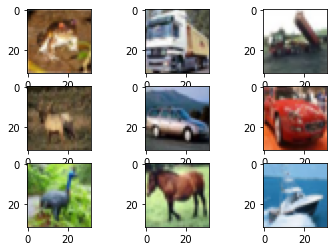

In [3]:

from matplotlib import pyplot
from keras.datasets import cifar10
# load dataset
(trainX, trainy), (testX, testy) = cifar10.load_data()

for i in range(9):
    pyplot.subplot(330 + 1 + i)
    pyplot.imshow(trainX[i])

pyplot.show()

In [4]:
import keras 
import keras.utils
from keras.utils.np_utils import to_categorical
import matplotlib.pyplot as plt

(trainX, trainY), (testX, testY) = cifar10.load_data()

# one hot encode target values
trainY = to_categorical(trainY)
testY = to_categorical(testY)

## Pre processing

In [5]:
print(trainX.shape)

(50000, 32, 32, 3)


In [6]:

trainX = trainX.astype('float32')
testX = testX.astype('float32')
# normalize to range 0-1
trainX = trainX / 255.0
testX= testX / 255.0


Define model architecture

## NET A ##

In [7]:
# defining the architecture of the model
from keras.models import Sequential
from keras.layers import Dense, InputLayer

#first convolutional network
#Model 1 
# converting 3 dimensional image to 1 dimensional image
trainflat = trainX.reshape(trainX.shape[0], 32*32*3)
testflat = testX.reshape(testX.shape[0], 32*32*3)
model=Sequential()
model.add(InputLayer(input_shape=trainflat.shape[1],))
model.add(Dense(units=10, activation='softmax'))



In [8]:

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])


In [9]:
NetA=model.fit(trainflat, trainY, epochs=50, batch_size=64, validation_data=(testflat, testY))

Epoch 1/50
782/782 [==============================] - 20s 3ms/step - loss: 2.0164 - accuracy: 0.2849 - val_loss: 1.8050 - val_accuracy: 0.3708
Epoch 2/50
782/782 [==============================] - 2s 2ms/step - loss: 1.8557 - accuracy: 0.3543 - val_loss: 1.8276 - val_accuracy: 0.3660
Epoch 3/50
782/782 [==============================] - 1s 2ms/step - loss: 1.8168 - accuracy: 0.3664 - val_loss: 1.8807 - val_accuracy: 0.3383
Epoch 4/50
782/782 [==============================] - 1s 2ms/step - loss: 1.8025 - accuracy: 0.3725 - val_loss: 1.8123 - val_accuracy: 0.3745
Epoch 5/50
782/782 [==============================] - 1s 2ms/step - loss: 1.7960 - accuracy: 0.3831 - val_loss: 1.7734 - val_accuracy: 0.3802
Epoch 6/50
782/782 [==============================] - 1s 2ms/step - loss: 1.7811 - accuracy: 0.3881 - val_loss: 1.8154 - val_accuracy: 0.3738
Epoch 7/50
782/782 [==============================] - 1s 2ms/step - loss: 1.7722 - accuracy: 0.3900 - val_loss: 1.8483 - val_accuracy: 0.3705
Epoch

In [10]:
_,acc = model.evaluate(testflat, testY, verbose=0)
print('> %.3f' % (acc * 100.0))

> 35.110


In [11]:
_,acc = model.evaluate(trainflat, trainY, verbose=0)
print('test_accuracy > %.3f' % (acc * 100.0))

test_accuracy > 39.712


In [12]:
import numpy as np
a=np.mean(NetA.history['accuracy'])
t=np.mean(NetA.history['val_accuracy'])
print('> %.3f' % (a * 100.0))

> 40.394


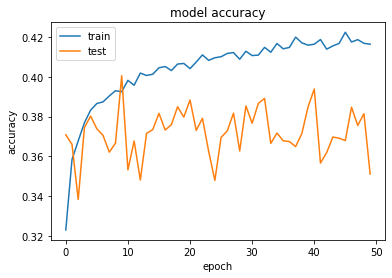

In [13]:
plt.plot(NetA.history['accuracy'])
plt.plot(NetA.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## NET B ##

In [14]:
##Model 2
trainflat = trainX.reshape(trainX.shape[0], 32*32*3)
testflat = testX.reshape(testX.shape[0], 32*32*3)
model2=Sequential()
model2.add(InputLayer(input_shape=trainflat.shape[1],))
model2.add(Dense(300, activation='relu'))
model2.add(Dense(units=10, activation='softmax'))


In [15]:
model2.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])


In [16]:
NetB=model2.fit(trainflat, trainY, epochs=50, batch_size=64, validation_data=(testflat, testY))

Epoch 1/50
782/782 [==============================] - 7s 8ms/step - loss: 2.0627 - accuracy: 0.2800 - val_loss: 1.7841 - val_accuracy: 0.3608
Epoch 2/50
782/782 [==============================] - 6s 8ms/step - loss: 1.7387 - accuracy: 0.3801 - val_loss: 1.7293 - val_accuracy: 0.3756
Epoch 3/50
782/782 [==============================] - 6s 8ms/step - loss: 1.6639 - accuracy: 0.4095 - val_loss: 1.6424 - val_accuracy: 0.4100
Epoch 4/50
782/782 [==============================] - 6s 8ms/step - loss: 1.6173 - accuracy: 0.4273 - val_loss: 1.5870 - val_accuracy: 0.4366
Epoch 5/50
782/782 [==============================] - 6s 8ms/step - loss: 1.5804 - accuracy: 0.4423 - val_loss: 1.5739 - val_accuracy: 0.4464
Epoch 6/50
782/782 [==============================] - 6s 8ms/step - loss: 1.5544 - accuracy: 0.4491 - val_loss: 1.5931 - val_accuracy: 0.4255
Epoch 7/50
782/782 [==============================] - 6s 8ms/step - loss: 1.5314 - accuracy: 0.4550 - val_loss: 1.5616 - val_accuracy: 0.4448
Epoch 

In [17]:
_,acc = model2.evaluate(testflat, testY, verbose=0)
print('> %.3f' % (acc * 100.0))

> 49.120


## NET C ##

In [18]:
model3=Sequential()
model3.add(tf.keras.layers.Conv2D(filters=25,kernel_size=5, activation='relu', input_shape=[32, 32, 3], padding='same'))
model3.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
model3.add(tf.keras.layers.Flatten())
model3.add(Dense(units=10, activation='softmax'))

In [19]:
model3.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])


In [20]:
NetC=model3.fit(trainX, trainY, epochs=50, batch_size=64, validation_data=(testX, testY))

Epoch 1/50
782/782 [==============================] - 40s 42ms/step - loss: 1.7691 - accuracy: 0.3670 - val_loss: 1.3191 - val_accuracy: 0.5362
Epoch 2/50
782/782 [==============================] - 32s 41ms/step - loss: 1.2742 - accuracy: 0.5564 - val_loss: 1.2685 - val_accuracy: 0.5482
Epoch 3/50
782/782 [==============================] - 32s 41ms/step - loss: 1.1544 - accuracy: 0.5990 - val_loss: 1.1668 - val_accuracy: 0.5936
Epoch 4/50
782/782 [==============================] - 33s 42ms/step - loss: 1.0806 - accuracy: 0.6231 - val_loss: 1.1272 - val_accuracy: 0.6077
Epoch 5/50
782/782 [==============================] - 33s 42ms/step - loss: 1.0142 - accuracy: 0.6493 - val_loss: 1.1292 - val_accuracy: 0.6063
Epoch 6/50
782/782 [==============================] - 32s 41ms/step - loss: 0.9824 - accuracy: 0.6604 - val_loss: 1.1228 - val_accuracy: 0.6103
Epoch 7/50
782/782 [==============================] - 40s 51ms/step - loss: 0.9328 - accuracy: 0.6774 - val_loss: 1.1219 - val_accuracy:

## Visualization ##

==== Training History for NETA ====
Train Accuracy :  41.632
Test Accuracy:  35.110


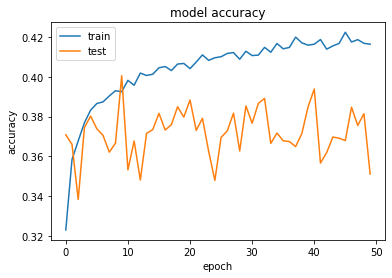

==== Training History for NETB ====
Train Accuracy :  53.528
Test Accuracy:  49.120


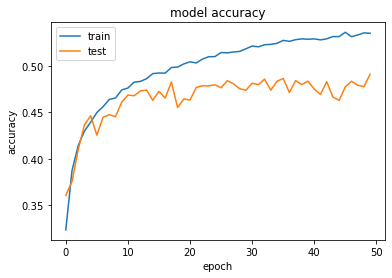

==== Training History for NETB ====
Train Accuracy :  83.886
Test Accuracy:  61.590


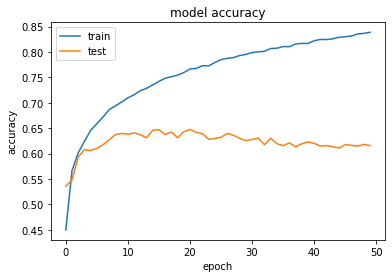

In [29]:
models = [NetA, NetB, NetC]
m=['NETA','NETB','NETC']
i=0
for net in models:
    print(f'==== Training History for {m[i]} ====')
    i=+1
    train_accuracy=net.history['accuracy'][-1]
    test_accuracy=net.history['val_accuracy'][-1]
    print('Train Accuracy :  %.3f' % (train_accuracy * 100.0)) 
    print('Test Accuracy:  %.3f' % (test_accuracy * 100.0))
    plt.plot(net.history['accuracy'])
    plt.plot(net.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()